In [1]:
import pandas as pd #For dataframes
import matplotlib.pylab as plt #For plotting
from scipy.cluster.hierarchy import linkage #For distance calculation
import scipy.cluster.hierarchy as sch #For Dendrogram
from sklearn.cluster import AgglomerativeClustering #For clustering

In [2]:
Univ = pd.read_csv("Datasets/Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
# Normalization function 
#def norm_func(i):
 #   x = (i-i.min()) / (i.max()-i.min())
  #  return (x)

# alternative to normalization function is Standardization 

def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [4]:
df_norm = norm_func(Univ.iloc[:,1:])
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01
mean,-4.796163e-16,-2.131628e-16,-1.332268e-16,-1.754152e-16,0.000000,9.769963e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-2.412704e+00,-2.494609e+00,-1.277417e+00,-1.652182e+00,-1.295262,-2.177135e+00
25%,-2.440020e-01,-1.276120e-01,-7.705055e-01,-4.228798e-01,-0.849088,-6.315015e-01
50%,1.712813e-01,2.325832e-01,-1.622117e-01,-1.770194e-01,0.011439,3.621197e-01
75%,6.788497e-01,6.956914e-01,5.474645e-01,3.147012e-01,0.518687,8.037292e-01
max,1.370988e+00,1.210256e+00,2.575111e+00,3.019165e+00,2.508651,1.134936e+00


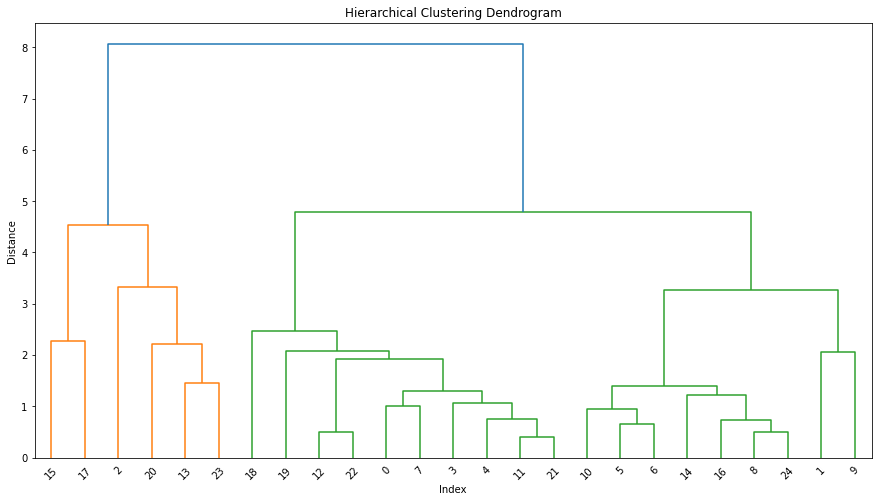

In [5]:
z = linkage(df_norm, method="complete",metric="euclidean") #Try changing different methods and analyze 
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=45.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

In [7]:
h_complete = AgglomerativeClustering(n_clusters=3,linkage='complete',metric='euclidean').fit(df_norm) 

h_complete.labels_

array([2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1], dtype=int64)

In [8]:
cluster_labels=pd.Series(h_complete.labels_)

In [9]:
Univ['clust']=cluster_labels

In [10]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [11]:
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]

In [12]:
Univ.head()

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,Brown,1310,89,22,13,22704,94
1,1,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,2,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [13]:
Univ.groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000
1,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000


In [14]:
result = Univ.groupby(Univ.clust).mean()

In [15]:
Univ.to_csv("Datasets/University_lables.csv", index =False)

In [16]:
result.to_csv("Datasets/University_result.csv", index =False)